In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from sklearn import metrics

In [2]:
df = pd.read_csv('winequalityN.csv')
#df = df.fillna(0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Checking for NULL Values
Sum = df.isnull().sum()
percentage = (df.isnull().sum()/df.isnull().count())
pd.concat([Sum,percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [4]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0]

In [5]:
fill_data = (null_cell(df)).index

In [6]:
df_new = df.copy()
for col in fill_data:
    df_new.loc[:, col].fillna(df_new.loc[:, col].mean(), inplace=True)
     #df_new.loc[:, col].fillna(0)

In [7]:
#df
#Checking for NULL Values
#Sum = df_new.isnull().sum()
#percentage = (df_new.isnull().sum()/df_new.isnull().count())
#pd.concat([Sum,percentage], axis =1, keys= ['Sum', 'Percentage'])

In [8]:
df_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


In [9]:
df_bins = df_new.copy()

In [10]:
df_bins.type = df_bins.type.map({'white':0, 'red':1})
bins = [0,4,7,10]

labels = [0,1,2] 

df_bins['quality_range'] = pd.cut(x = df_bins['quality'], bins = bins, labels = labels)


In [11]:
print(df_bins[['quality_range','quality']].head())

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


In [12]:
x_train,x_test,y_train,y_test = train_test_split(df_bins.iloc[:,:11],df_bins['quality_range'],random_state = 42,train_size = 0.8)

In [13]:
#x_train,x_test,y_train,y_test = train_test_split(df_bins['alcohol'],df_bins['quality_range'],random_state = 42,train_size = 0.8)

In [14]:
x_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
1916,0,6.6,0.25,0.36,8.1,0.045,54.0,180.0,0.99580,3.08,0.42
947,0,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36
877,0,6.0,0.28,0.34,1.6,0.119,33.0,104.0,0.99210,3.19,0.38
2927,0,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31
6063,1,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10


In [15]:
y_train.head()

1916    1
947     1
877     1
2927    1
6063    1
Name: quality_range, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [16]:
def decTreeScore2(crit = 'gini',  maxDepth =5 , minSamples = 1, minSplit = 5):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dect.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, dect.predict(x_test))
    
    y_pred = dect.predict(x_test)
    a = confusion_matrix(y_test,y_pred)
    print(accuracy)
    print(a)
    return accuracy,a 

In [17]:
decTreeScore2()

0.936923076923077
[[   5   43    0]
 [   7 1213    0]
 [   0   32    0]]


(0.936923076923077,
 array([[   5,   43,    0],
        [   7, 1213,    0],
        [   0,   32,    0]], dtype=int64))

In [18]:
decTreeScore2(crit = 'entropy')

0.936923076923077
[[   0   48    0]
 [   1 1218    1]
 [   0   32    0]]


(0.936923076923077,
 array([[   0,   48,    0],
        [   1, 1218,    1],
        [   0,   32,    0]], dtype=int64))

In [19]:
# use different maximum depth of the tree
#for i in np.arange(1, 15, 1):
    #decTreeScore2(maxDepth = i)
    
    
# from the result we see that when maximum depth allowed is 2 or 5, the accuracy score is highest

In [20]:
#for i in np.arange(1, 15, 1):
    #decTreeScore2(minSamples = i)
    
# when the minimum samples allowed in a leaf is  greater than 8, the accuracy score is the highest

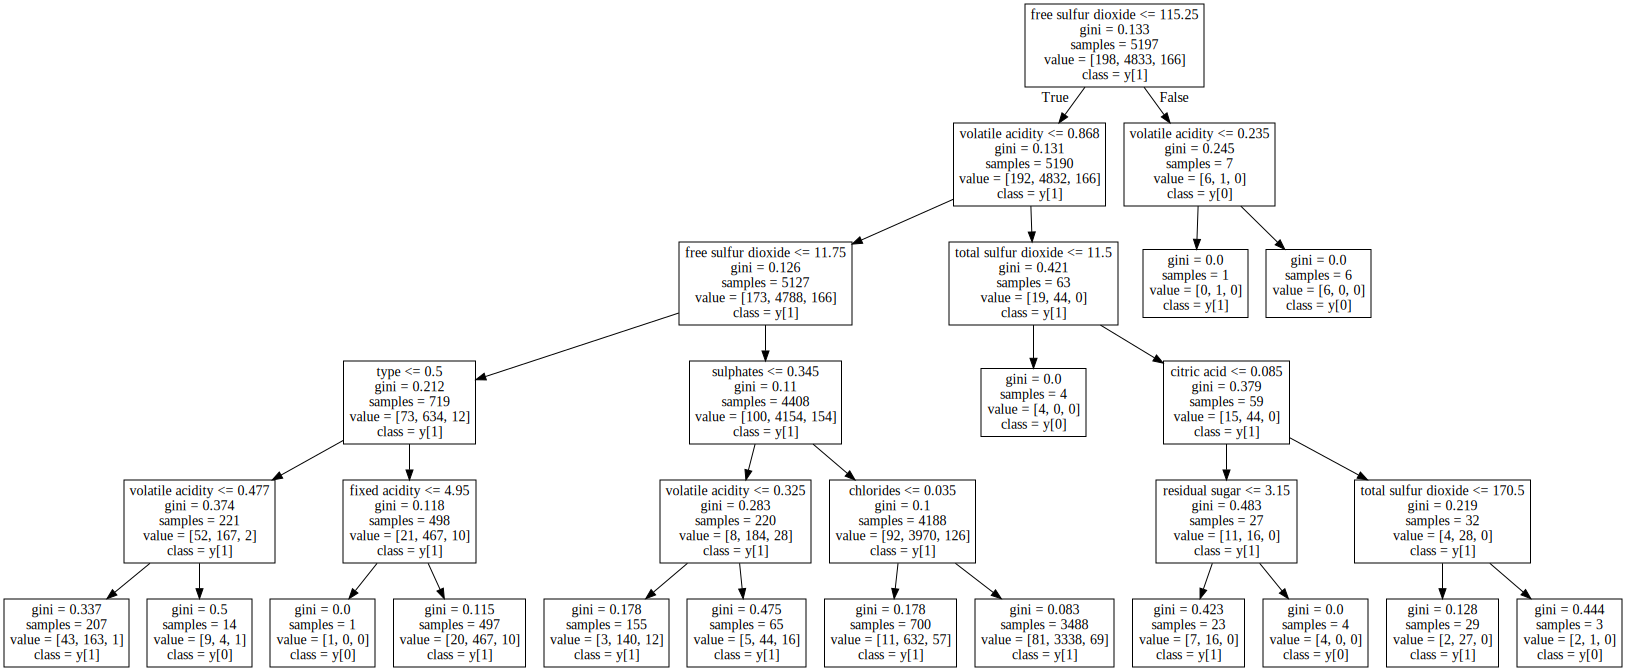

In [21]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier

dect = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 1, 
                                 min_samples_split = 5, random_state= 42)
dect.fit(x_train, y_train)

Source(tree.export_graphviz(dect, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

In [22]:
y_pred = dect.predict(x_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.936923076923077

In [23]:
#print(y_pred) # what the model predict entertainment labels
#print(y_test) # true labels
df = pd.DataFrame({'YTest':y_test,'YPred':y_pred})
df

,YTest,YPred
3103,1,1
1419,1,1
4761,1,1
4690,1,1
4032,1,1
...,...,...
889,1,1
2850,1,1
4917,1,1
5198,1,1


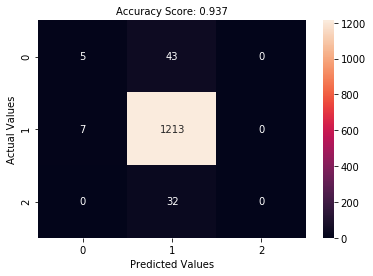

In [24]:
y_pred = dect.predict(x_test)
score = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred)

sn.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 10)
plt.show()